# Hotels Reviews Analysis

## Libraries needed

In [19]:
import random

#import needed libraries
import pandas as pd #for dataframes
import numpy as np #for arrays
import os
import sys
import csv
import glob
from nltk.corpus import stopwords
import re #for regular expressions
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data importation

we scrapped all reviews of some hotels in tripAdvisor in France


In [20]:
import pandas as pd
import os
path = "C:/Users/abdou/OneDrive/Documents/Data_hotels"
files= os.listdir(path)
files
test = pd.read_csv('C:/Users/abdou/OneDrive/Documents/Data_hotels/reviews_Hotel Aston La Scala.csv')

## Data understanding and cleaning

In [21]:
def get_all_reviews(path) :
    """

    :param path: path to hotel reviews file
    :return: df : All reviews of all hotels
    """
    df = pd.DataFrame()
    files= os.listdir(path)
    for f in files:
        try:
            data = pd.read_csv(path + '/'+ f)
            df = df.append(data)
        except :
            pass
    return df


In [22]:
df = get_all_reviews(path = path)

### Detect reviews language

As we have a lot of reviews, we try to detect reviews' language using **langdetect** a library ported from Google's language-detection.
**Note that langdetect gives language that has more words in text**. For example if we have a review mixed between 2 language, it will give us language with bigger proportion.

In [23]:
df

,Unnamed: 0,hotel_name,id_review,title,date,location,user_name,user_link,date_of_stay,rating,review,rating_review,n_review_user,n_votes_review
0,0,AC Hotel by Marriott Nice,858676765.0,The best in nice,Sep 6,"Burbank, California",armenianburbank,/Profile/armenianburbank,August 2022,40.0,The best thing about this hotel was the manage...,4.0,34.0,21.0
1,1,AC Hotel by Marriott Nice,852510704.0,Great service,Aug 2022,"L'Orignal, Ontario, Canada",Steve C,/Profile/P6582SZstevec,August 2022,50.0,The checkin was easy and swift. Breakfast had ...,5.0,23.0,27.0
2,2,AC Hotel by Marriott Nice,855890988.0,"Good location, unclean room",Aug 2022,"Amsterdam, The Netherlands",Tracy B,/Profile/TryBry,August 2022,30.0,"Pros: Location, black out curtains, friendly s...",3.0,1.0,1.0
3,3,AC Hotel by Marriott Nice,855208450.0,No beach beds,Aug 2022,Disneyland Paris,Kiki Y,/Profile/77kikiy,August 2022,20.0,The advertisement that they have beachbeds ava...,2.0,26.0,22.0
4,4,AC Hotel by Marriott Nice,854313007.0,"Unclean room, terrible customer service",Aug 2022,NaN,Jac W,/Profile/464jacw,July 2022,10.0,Had an incredibly frustrating experience and p...,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,Westminster Hotel & Spa,484574462.0,Perfect Location,May 2017,"Gloucestershire, United Kingdom",EH278,/Profile/EH278,May 2017,50.0,The hotel is situated directly across from the...,5.0,50.0,35.0
266,266,Westminster Hotel & Spa,482934362.0,Simply the best,May 2017,"New York City, New York",alexiapendergrast,/Profile/alexiapendergrast,April 2017,50.0,We spent here just one night and everything wa...,5.0,5.0,3.0
267,267,Westminster Hotel & Spa,480901584.0,Superb!,May 2017,"Dublin, Ireland",Skeletor1,/Profile/Skeletor1,October 2016,50.0,A beautiful hotel - really old style blended s...,5.0,115.0,12.0
268,268,Westminster Hotel & Spa,480763869.0,"Stunning hotel, wonderful service, amazing views",May 2017,"Melbourne, Australia",Lydz1970,/Profile/Lydz1970,August 2016,50.0,We loved our week at this beautiful hotel. Th...,5.0,109.0,142.0


In [24]:
from langdetect import detect
df['score_lang'] = df.review
for i in range(0,len(df)) :
    df['score_lang'].iloc[i] = detect(df.review.iloc[i])

In [25]:
df.score_lang.value_counts()

en    10372
ru        2
he        1
Name: score_lang, dtype: int64

We see that english is the most used language but also we see some anoter languages like espagnol, italian and hebrew.

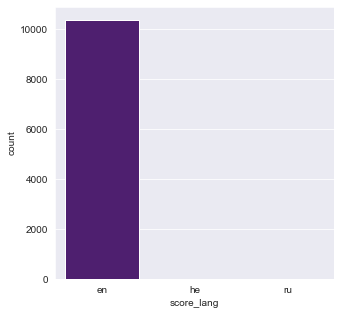

In [26]:

plt.figure(figsize=(5, 5))
sns.countplot(x='score_lang',
            palette='magma', data=df)

plt.show()

### rating, location and User name study

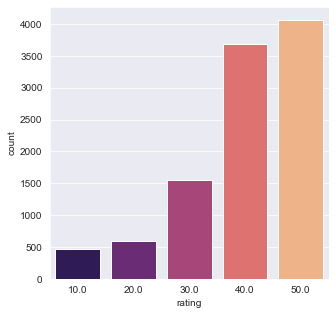

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(x='rating',
              palette='magma', data=df)

plt.show()

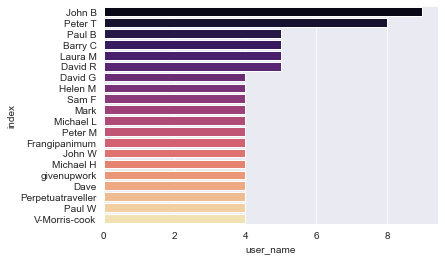

In [28]:
temp =df.user_name.value_counts().head(20).reset_index()
sns.barplot(x='user_name',y='index',
              palette='magma', data=temp)
plt.show()

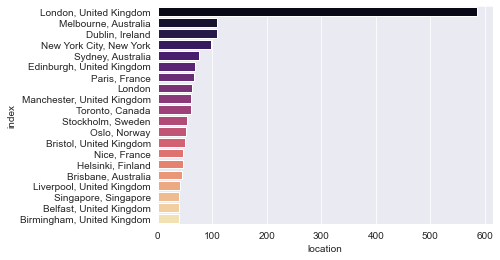

In [29]:
temp =df.location.value_counts().head(20).reset_index()
sns.barplot(x='location',y='index',
            palette='magma', data=temp)
plt.show()

most of reviews are from UK and US which explains why we have almost all reviews are in English.

### Creation of new variable **is_bad_review** 

I create a new boolean variable **is_bad_review** :
* 0 if good review ==> rating > 4
* 1 if bad review  ==> rating <= 4


In [30]:
# create the label
#we devide by 10 because we had 50 as 5 in db, 40 as 4 and so on.
df['rating'] = df['rating']/10
df["is_bad_review"] = df["rating"].apply(lambda x: 1 if x <= 4 else 0)
# select only relevant columns


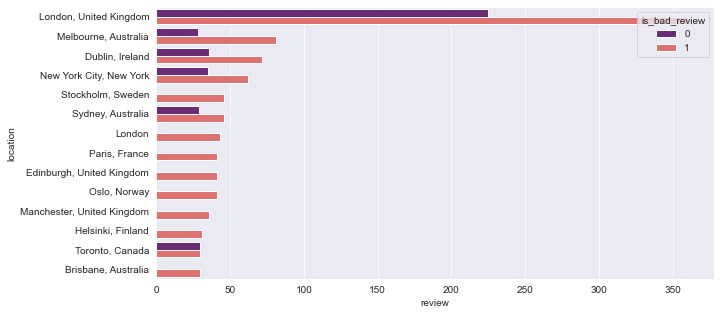

In [31]:
#top review from any location segmented by the varibale is_bad_review
temp = df.groupby(['location', 'is_bad_review'])['review'].count().reset_index().sort_values(by='review', ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='review', y='location',hue='is_bad_review',
            palette='magma', data=temp)



plt.show()

In [32]:
temp

,location,is_bad_review,review
1873,"London, United Kingdom",1,360
1872,"London, United Kingdom",0,225
2018,"Melbourne, Australia",1,81
978,"Dublin, Ireland",1,72
2228,"New York City, New York",1,62
3084,"Stockholm, Sweden",1,46
3158,"Sydney, Australia",1,46
1860,London,1,43
2466,"Paris, France",1,41
1044,"Edinburgh, United Kingdom",1,41


In [33]:
df.rating.value_counts()

5.0    4065
4.0    3688
3.0    1559
2.0     595
1.0     468
Name: rating, dtype: int64

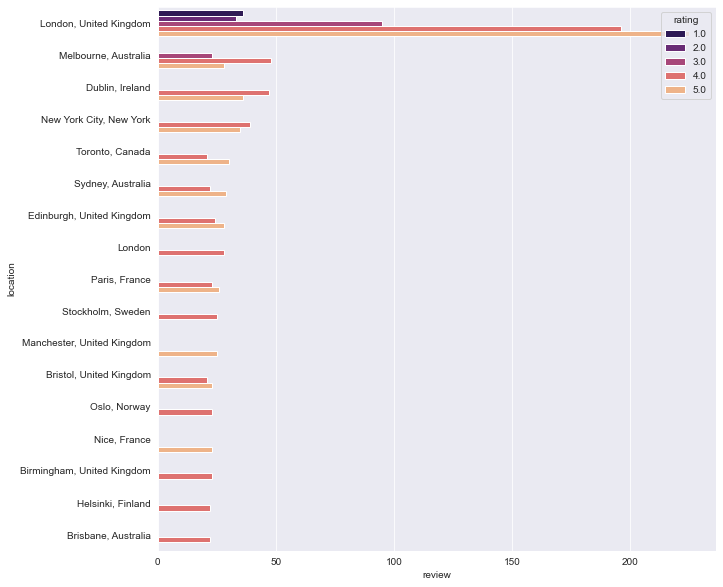

In [34]:
#top review from any location segmented by the varibale is_bad_review
temp = df.groupby(['location', 'rating'])['review'].count().reset_index().sort_values(by='review', ascending=False).head(30)
plt.figure(figsize=(10, 10))
sns.barplot(x='review', y='location',hue='rating',
            palette='magma', data=temp)



plt.show()

In [35]:
df1 = df.copy()

### Focus on reviews and is_bad_review variable only

In [36]:
# Checking the hotel with the highest number of reviews
df.pivot_table(index=['hotel_name'], aggfunc='size').sort_values(ascending=False)

hotel_name
Nice Excelsior Hotel                      500
NH Nice                                   495
Villa Saint Exupery Beach Hostel          490
Ajoupa Apart'hotel Nice, un hotel AMMI    485
La Villa Nice Victor Hugo                 480
Ibis Nice Centre Gare                     470
Hotel Aston La Scala                      470
Hotel Boscolo Nice                        460
Hotel Gounod Nice                         452
AC Hotel by Marriott Nice                 438
Splendid Hotel & Spa                      437
Ibis Styles Nice Vieux Port               435
Aparthotel Adagio Nice Centre             429
Goldstar Suites                           420
Best Western Plus Hotel Massena Nice      400
Hotel Le Grimaldi by HappyCulture         380
Hotel de la Fontaine                      380
Hotel Vendome                             377
Novotel Suites Nice Aeroport              370
Adagio Nice Promenade Des Anglais         308
Ibis Budget Nice Aeroport                 290
Hotel Trocadero        

<AxesSubplot:xlabel='is_bad_review', ylabel='count'>

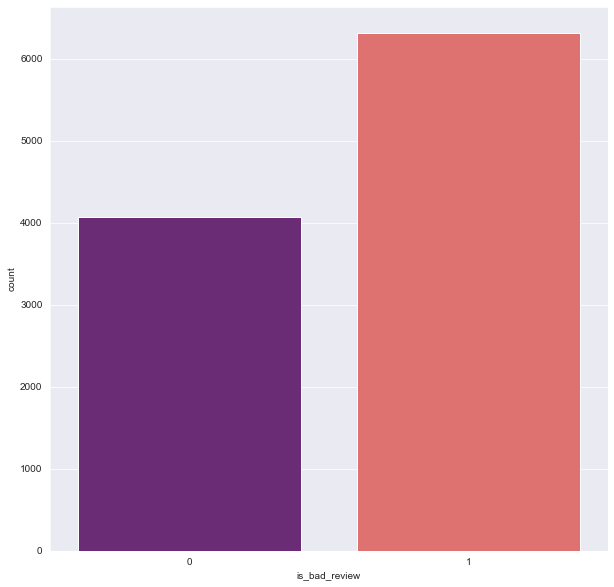

In [37]:
plt.figure(figsize=(10, 10))
sns.countplot(x='is_bad_review',palette='magma', data=df)

We can see that we have most of positive reviews

<AxesSubplot:xlabel='is_bad_review', ylabel='count'>

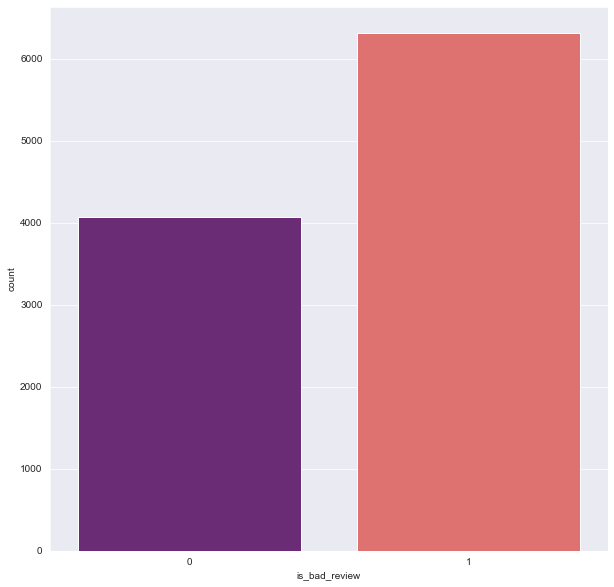

In [38]:
df["is_bad_review"] = df["rating"].apply(lambda x: 1 if x < 5 else 0)
plt.figure(figsize=(10, 10))
sns.countplot(x='is_bad_review',palette='magma', data=df)

<AxesSubplot:xlabel='is_bad_review', ylabel='count'>

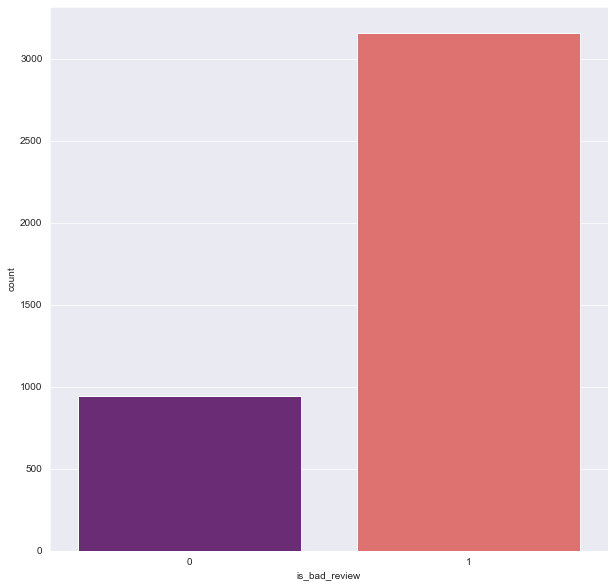

In [39]:
import random
#we try to fix the imbalance of proportions 0 and 1
df_Score_0 = df[df.is_bad_review == 1].sample(frac=0.50)
df_Score_1 = df[df.is_bad_review == 0].sample(frac=0.232)

dfs = [df_Score_1, df_Score_0]
df1 = pd.concat(dfs)
df1.shape
plt.figure(figsize=(10, 10))
sns.countplot(x='is_bad_review',palette='magma', data=df1)

In [40]:
#mix randomly the table
df1 = df1.sample(frac = 1)
df1

,Unnamed: 0,hotel_name,id_review,title,date,location,user_name,user_link,date_of_stay,rating,review,rating_review,n_review_user,n_votes_review,score_lang,is_bad_review
304,304,Hotel Le Grimaldi by HappyCulture,505584576.0,Good stay in Nice,Jul 2017,"Stockholm, Sweden",Anna,/Profile/AnnaStockholm19,July 2017,4.0,We ended up staying at this hotel twice during...,4.0,17.0,26.0,en,1
94,94,AC Hotel by Marriott Nice,611807829.0,Good location but not family friendly,Aug 2018,"Waterford, Ireland",sandramurphy,/Profile/sandramurphy,August 2018,3.0,We stayed here from the 20th to the 26th of Au...,3.0,26.0,35.0,en,1
287,287,Hotel Le Grimaldi by HappyCulture,524715797.0,Great location charming hotel,Sep 2017,"Birmingham, United Kingdom",wollychecka,/Profile/wollychecka,September 2017,4.0,This was our second visit to the hotel and we ...,4.0,80.0,45.0,en,1
339,339,Ibis Styles Nice Vieux Port,144486390.0,The All Seasons Experience,Nov 2012,"Stoke-on-Trent, United Kingdom",gordonwperry,/Profile/gordonwperry,November 2012,3.0,Stayed at the All Seasons hotel many time (Mr ...,3.0,6.0,1.0,en,1
100,100,Splendid Hotel & Spa,619245462.0,Wonderful stay,Sep 2018,"Sydney, Australia",Happy Traveller,/Profile/karenm642,May 2018,4.0,"Make no mistake, this is an older hotel , howe...",4.0,5234.0,464.0,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,Hotel Aston La Scala,574005786.0,'could be better',Apr 2018,Hereford,traceygoulding77,/Profile/traceygoulding77,April 2018,3.0,This could be a great hotel if it weren't for ...,3.0,130.0,116.0,en,1
80,80,Splendid Hotel & Spa,638224445.0,Splendid stay ...,Dec 2018,"London, United Kingdom",Hari_1976,/Profile/Hari_1976,December 2018,4.0,"Short break in Nice, visited Cannes and Monoco...",4.0,54.0,49.0,en,1
271,271,Novotel Suites Nice Aeroport,134706703.0,Excellent budget holiday,Jul 2012,"Leeds, United Kingdom",Cozzie25,/Profile/Cozzie25,July 2012,5.0,Superb and clean hotel. Was a little apprehe...,5.0,2.0,4.0,en,0
395,395,Hotel Boscolo Nice,493944986.0,From the moment we arrived,Jun 2017,"Dubai, United Arab Emirates",RichardUpshall,/Profile/RichardUpshall,June 2017,1.0,"A rather abrupt lady checked me in on arrival,...",1.0,1620.0,458.0,en,1


In [41]:
reviews_df = df1.copy()
reviews_df

,Unnamed: 0,hotel_name,id_review,title,date,location,user_name,user_link,date_of_stay,rating,review,rating_review,n_review_user,n_votes_review,score_lang,is_bad_review
304,304,Hotel Le Grimaldi by HappyCulture,505584576.0,Good stay in Nice,Jul 2017,"Stockholm, Sweden",Anna,/Profile/AnnaStockholm19,July 2017,4.0,We ended up staying at this hotel twice during...,4.0,17.0,26.0,en,1
94,94,AC Hotel by Marriott Nice,611807829.0,Good location but not family friendly,Aug 2018,"Waterford, Ireland",sandramurphy,/Profile/sandramurphy,August 2018,3.0,We stayed here from the 20th to the 26th of Au...,3.0,26.0,35.0,en,1
287,287,Hotel Le Grimaldi by HappyCulture,524715797.0,Great location charming hotel,Sep 2017,"Birmingham, United Kingdom",wollychecka,/Profile/wollychecka,September 2017,4.0,This was our second visit to the hotel and we ...,4.0,80.0,45.0,en,1
339,339,Ibis Styles Nice Vieux Port,144486390.0,The All Seasons Experience,Nov 2012,"Stoke-on-Trent, United Kingdom",gordonwperry,/Profile/gordonwperry,November 2012,3.0,Stayed at the All Seasons hotel many time (Mr ...,3.0,6.0,1.0,en,1
100,100,Splendid Hotel & Spa,619245462.0,Wonderful stay,Sep 2018,"Sydney, Australia",Happy Traveller,/Profile/karenm642,May 2018,4.0,"Make no mistake, this is an older hotel , howe...",4.0,5234.0,464.0,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,Hotel Aston La Scala,574005786.0,'could be better',Apr 2018,Hereford,traceygoulding77,/Profile/traceygoulding77,April 2018,3.0,This could be a great hotel if it weren't for ...,3.0,130.0,116.0,en,1
80,80,Splendid Hotel & Spa,638224445.0,Splendid stay ...,Dec 2018,"London, United Kingdom",Hari_1976,/Profile/Hari_1976,December 2018,4.0,"Short break in Nice, visited Cannes and Monoco...",4.0,54.0,49.0,en,1
271,271,Novotel Suites Nice Aeroport,134706703.0,Excellent budget holiday,Jul 2012,"Leeds, United Kingdom",Cozzie25,/Profile/Cozzie25,July 2012,5.0,Superb and clean hotel. Was a little apprehe...,5.0,2.0,4.0,en,0
395,395,Hotel Boscolo Nice,493944986.0,From the moment we arrived,Jun 2017,"Dubai, United Arab Emirates",RichardUpshall,/Profile/RichardUpshall,June 2017,1.0,"A rather abrupt lady checked me in on arrival,...",1.0,1620.0,458.0,en,1


In [42]:
reviews_df  = reviews_df[["review", "is_bad_review"]]
reviews_df.is_bad_review.value_counts()

1    3155
0     943
Name: is_bad_review, dtype: int64

In [43]:
reviews_df.review.iloc[0]

"We ended up staying at this hotel twice during our stay in the South of France. Our first visit was lovely and we had no complaints, the room was spacious, nicely decorated and fresh. My only complaint about the room is the hair dryer, it's impossible to dry your hair with it because the power is so weak. On our second stay at the hotel, we were a little surprised to be given a tiny room, but we weren't fussed, we found it quite amusing how different the two rooms were. Unfortunately the bathroom floors were not clean and on the back of the bathroom door was used towels from the previous guest who had the room. We loved the coffee in the entrance! Much bettter than having powdered coffee in the bedrooms.The staff were very helpful and cheerful, they seemed very attentive to any of our needs and we felt very welcome."

In [44]:
# return the wordnet object value corresponding to the POS tag
import nltk
from sklearn.feature_extraction import text
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
# Words that don't bring much sense to a word cloud


def clean_text(text, stop):
    """

    :param text:
    :param stop:
    :return:
    """
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words

    #stop = set(stopwords.words('english'))
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x, set(stopwords.words('english'))))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdou\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abdou\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdou\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abdou\AppData\Roaming\nltk_data...


In [45]:
reviews_df

,review,is_bad_review,review_clean
304,We ended up staying at this hotel twice during...,1,end stay hotel twice stay south france first v...
94,We stayed here from the 20th to the 26th of Au...,1,stay august husband month old baby cannot rate...
287,This was our second visit to the hotel and we ...,1,second visit hotel go superior room standard r...
339,Stayed at the All Seasons hotel many time (Mr ...,1,stayed season hotel many time mr bed comfort h...
100,"Make no mistake, this is an older hotel , howe...",1,make mistake old hotel however stay three nigh...
...,...,...,...
427,This could be a great hotel if it weren't for ...,1,could great hotel number small let downs locat...
80,"Short break in Nice, visited Cannes and Monoco...",1,short break nice visit cannes monoco day trip ...
271,Superb and clean hotel. Was a little apprehe...,0,superb clean hotel little apprehensive give re...
395,"A rather abrupt lady checked me in on arrival,...",1,rather abrupt lady check arrival insisted nati...


### Most common words in our dataframe

In [63]:
from nltk.probability import FreqDist
temp = reviews_df["review_clean"].apply(lambda x: x.split(" "))
temp
common_words = [item for sublist in test for item in sublist]
freq_common = FreqDist(common_words)
#freq_common

In [64]:
#top 25
#freq_common.most_common(40)

In [48]:
reviews_df1 = reviews_df.copy()

In [49]:
add_stop_words = ['t','great','good','nice','really','stay','do',
                  'positive','money','like',"make", "go", 'also', 'just',  'really',
                  'minute', 'could', 'like', 'recommend', 'time', 'day', 'well', 'get', 'would', 'good', 'nice', 'great', 'hotel']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

reviews_df1['review_clean'] = reviews_df1["review"].apply(lambda x: clean_text(x, stop_words))
def get_freq_words(df, var) :
    """

    :param df: df table
    :param var: which column
    :return: freq table
    """
# clean text data
    temp = df[var].apply(lambda x: x.split(" "))
    common_words = [item for sublist in temp for item in sublist]
    freq_common = FreqDist(common_words)
    data_bar_counts = [x[1] for x in freq_common.most_common(20)]
    data_bar_words = [x[0] for x in freq_common.most_common(20)]
    # Plotting the top 20 words in the positive reviews
    new_figure = plt.figure(figsize=(20,7))
    ax2 = new_figure.add_subplot(122)
    ax2.bar(data_bar_words, data_bar_counts)
    for ax in new_figure.axes:
        plt.sca(ax)
        plt.xticks(rotation=60)
    plt.tight_layout(pad=0)
    plt.xticks(fontsize=18)
    return freq_common.most_common(20)

[('room', 6672),
 ('staff', 2666),
 ('breakfast', 2210),
 ('walk', 2143),
 ('clean', 1992),
 ('location', 1853),
 ('night', 1776),
 ('small', 1498),
 ('bed', 1360),
 ('stay', 1310),
 ('helpful', 1221),
 ('friendly', 1190),
 ('area', 1184),
 ('station', 1149),
 ('old', 1108),
 ('place', 1072),
 ('bathroom', 1069),
 ('do', 1057),
 ('train', 1030),
 ('restaurant', 1005)]

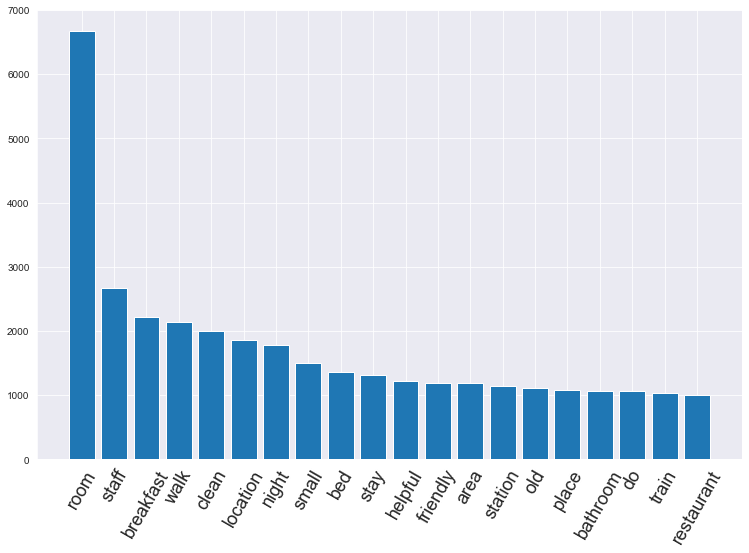

In [50]:
get_freq_words(reviews_df1, 'review_clean')

In [51]:
# Creating new dfs for each classification
data_positive = reviews_df1[reviews_df1['is_bad_review']==0]
data_negative = reviews_df1[reviews_df1['is_bad_review']==1]
data_positive

,review,is_bad_review,review_clean
85,Stayed here as a base for the Monaco grand Pri...,0,stayed base monaco grand prix approach car par...
21,A group of friends and I stayed there for 2 ni...,0,group friends stay nites perfect location clos...
244,The lunch menu is afordable and really good. S...,0,lunch menu afordable service expect luxury wor...
474,This apart hotel is located in the center of n...,0,apart locate center walk street minute foot be...
211,We stayed at this hotel for four nights in ear...,0,stay night early june location convenient publ...
...,...,...,...
11,We stayed at Le Panoramic for 3 nights and sho...,0,stay le panoramic night stay loved area comfor...
239,"Clean, friendly helpful staff. Was a great loc...",0,clean friendly helpful staff location visit mo...
136,Great hotel for both location and atmosphere. ...,0,location atmosphere manager staff fantastic fr...
271,Superb and clean hotel. Was a little apprehe...,0,superb clean little apprehensive give review l...


[('room', 5635),
 ('staff', 1937),
 ('breakfast', 1775),
 ('walk', 1665),
 ('clean', 1552),
 ('night', 1500),
 ('location', 1395),
 ('small', 1287),
 ('bed', 1126),
 ('stay', 1037),
 ('area', 976),
 ('do', 959),
 ('station', 934),
 ('bathroom', 915),
 ('old', 892),
 ('helpful', 852),
 ('friendly', 836),
 ('close', 825),
 ('place', 822),
 ('train', 820)]

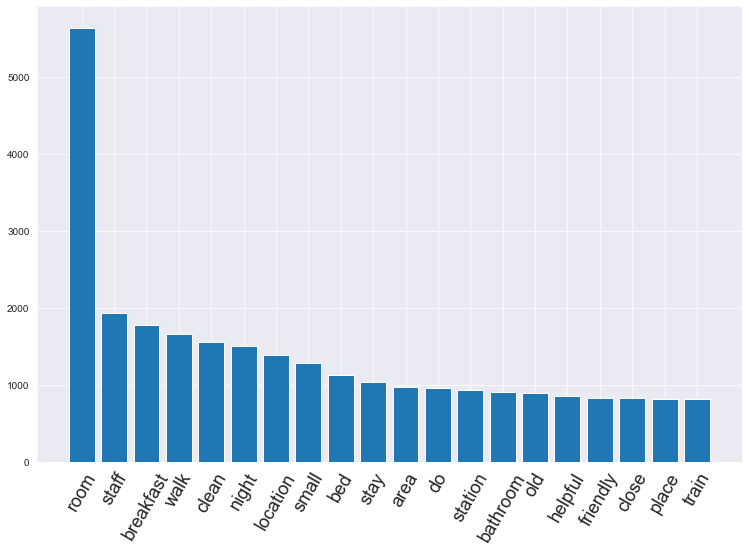

In [52]:
get_freq_words(data_negative, 'review_clean')

[('room', 1037),
 ('staff', 729),
 ('walk', 478),
 ('location', 458),
 ('clean', 440),
 ('breakfast', 435),
 ('helpful', 369),
 ('friendly', 354),
 ('night', 276),
 ('stay', 273),
 ('place', 250),
 ('beach', 242),
 ('bed', 234),
 ('restaurant', 228),
 ('comfortable', 218),
 ('old', 216),
 ('station', 215),
 ('small', 211),
 ('train', 210),
 ('area', 208)]

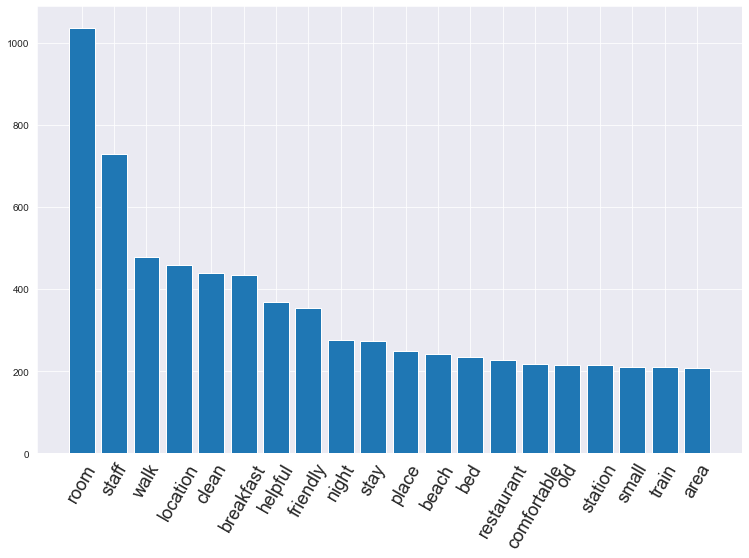

In [53]:
get_freq_words(data_positive, 'review_clean')

### Vader sentiment analysis

In [54]:

# add sentiment anaylsis columns
#Vader for nltk to analyze sentimentAnalysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df1["sentiments"] = reviews_df1["review"].apply(lambda x: sid.polarity_scores(x))
reviews_sen_df1 = pd.concat([reviews_df1.drop(['sentiments'], axis=1), reviews_df1['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abdou\AppData\Roaming\nltk_data...


In [55]:
reviews_sen_df1

,review,is_bad_review,review_clean,neg,neu,pos,compound
304,We ended up staying at this hotel twice during...,1,end stay twice south france visit lovely compl...,0.075,0.756,0.170,0.9643
94,We stayed here from the 20th to the 26th of Au...,1,stay august husband month old baby rate locati...,0.056,0.851,0.093,0.9292
287,This was our second visit to the hotel and we ...,1,second visit go superior room standard room qu...,0.000,0.694,0.306,0.9936
339,Stayed at the All Seasons hotel many time (Mr ...,1,stayed season mr bed comfort seasons)room quit...,0.183,0.773,0.044,-0.9335
100,"Make no mistake, this is an older hotel , howe...",1,mistake old stayed night thoroughly enjoy room...,0.025,0.753,0.223,0.9883
...,...,...,...,...,...,...,...
427,This could be a great hotel if it weren't for ...,1,weren't number small let downs location perfec...,0.123,0.746,0.131,0.4556
80,"Short break in Nice, visited Cannes and Monoco...",1,short break visited cannes monoco trip locatio...,0.017,0.783,0.200,0.9896
271,Superb and clean hotel. Was a little apprehe...,0,superb clean little apprehensive give review l...,0.038,0.699,0.263,0.9957
395,"A rather abrupt lady checked me in on arrival,...",1,abrupt lady check arrival insisted national id...,0.055,0.816,0.129,0.9614


In [56]:
reviews_sen_df1.review_clean.iloc[0]


"end stay twice south france visit lovely complaint room spacious nicely decorate fresh complaint room hair dryer it's impossible dry hair power weak second little surprise give tiny room weren't fuss quite amusing different room unfortunately bathroom floor clean bathroom door use towel previous guest room love coffee entrance bettter have powder coffee bedrooms.the staff helpful cheerful attentive need felt welcome"

In [57]:
# add number of characters column
reviews_sen_df1["nb_chars"] = reviews_sen_df1["review"].apply(lambda x: len(x))

# add number of words column
reviews_sen_df1["nb_words"] = reviews_sen_df1["review"].apply(lambda x: len(x.split(" ")))

In [58]:
reviews_df

,review,is_bad_review,review_clean
304,We ended up staying at this hotel twice during...,1,end stay hotel twice stay south france first v...
94,We stayed here from the 20th to the 26th of Au...,1,stay august husband month old baby cannot rate...
287,This was our second visit to the hotel and we ...,1,second visit hotel go superior room standard r...
339,Stayed at the All Seasons hotel many time (Mr ...,1,stayed season hotel many time mr bed comfort h...
100,"Make no mistake, this is an older hotel , howe...",1,make mistake old hotel however stay three nigh...
...,...,...,...
427,This could be a great hotel if it weren't for ...,1,could great hotel number small let downs locat...
80,"Short break in Nice, visited Cannes and Monoco...",1,short break nice visit cannes monoco day trip ...
271,Superb and clean hotel. Was a little apprehe...,0,superb clean hotel little apprehensive give re...
395,"A rather abrupt lady checked me in on arrival,...",1,rather abrupt lady check arrival insisted nati...


In [59]:

# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_sen_df1["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_sen_df1["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_sen_df1 = pd.concat([reviews_sen_df1, doc2vec_df], axis=1)

In [60]:
reviews_sen_df1

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
304,We ended up staying at this hotel twice during...,1,end stay twice south france visit lovely compl...,0.075,0.756,0.170,0.9643,827,153,0.459358,0.601001,0.543783,0.368022,-0.472416
94,We stayed here from the 20th to the 26th of Au...,1,stay august husband month old baby rate locati...,0.056,0.851,0.093,0.9292,1848,363,0.299538,0.723222,0.762879,-0.440140,-1.371875
287,This was our second visit to the hotel and we ...,1,second visit go superior room standard room qu...,0.000,0.694,0.306,0.9936,624,118,0.311005,0.432651,0.572079,-0.043517,-0.234040
339,Stayed at the All Seasons hotel many time (Mr ...,1,stayed season mr bed comfort seasons)room quit...,0.183,0.773,0.044,-0.9335,451,74,0.348568,0.285614,0.722122,-0.057322,-0.394902
100,"Make no mistake, this is an older hotel , howe...",1,mistake old stayed night thoroughly enjoy room...,0.025,0.753,0.223,0.9883,985,172,0.890519,0.713671,0.108004,-0.135952,-0.742259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,This could be a great hotel if it weren't for ...,1,weren't number small let downs location perfec...,0.123,0.746,0.131,0.4556,1315,242,0.993977,0.685289,1.204896,0.071094,-0.645130
80,"Short break in Nice, visited Cannes and Monoco...",1,short break visited cannes monoco trip locatio...,0.017,0.783,0.200,0.9896,975,183,0.629822,0.391222,0.504180,-0.608130,-0.064024
271,Superb and clean hotel. Was a little apprehe...,0,superb clean little apprehensive give review l...,0.038,0.699,0.263,0.9957,1155,209,0.721080,0.693773,0.653868,-0.791036,-0.159233
395,"A rather abrupt lady checked me in on arrival,...",1,abrupt lady check arrival insisted national id...,0.055,0.816,0.129,0.9614,1427,264,0.649741,0.954110,1.847681,-0.205599,-0.657535


In [61]:
# show is_bad_review distribution
reviews_sen_df1["is_bad_review"].value_counts(normalize = True)

1    0.769888
0    0.230112
Name: is_bad_review, dtype: float64

### Worldcloud

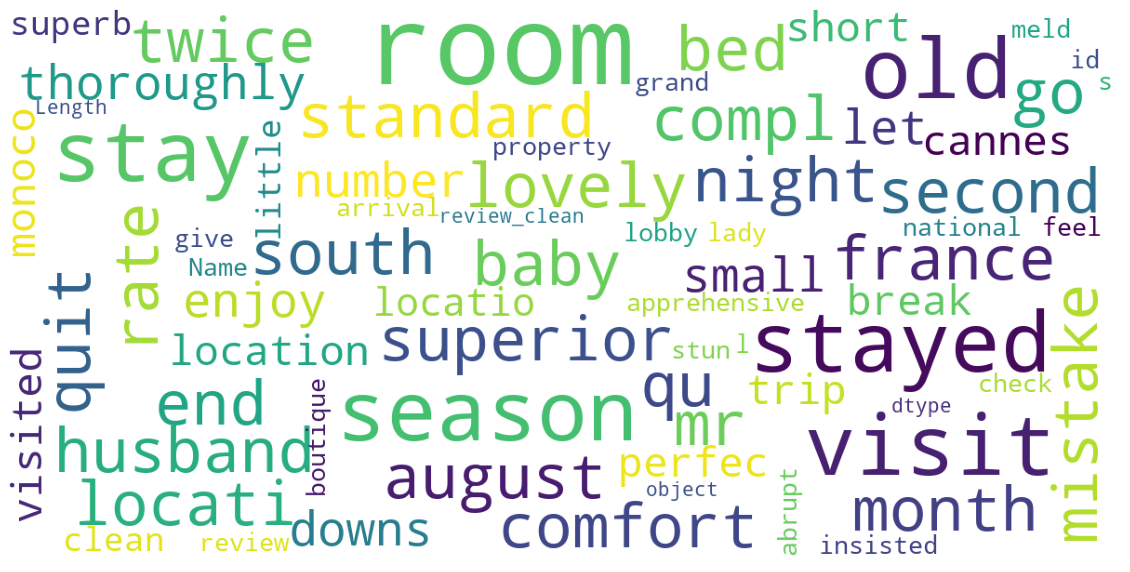

In [66]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    """

    :param data:
    :param title:
    :return:
    """
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(reviews_sen_df1["review_clean"])

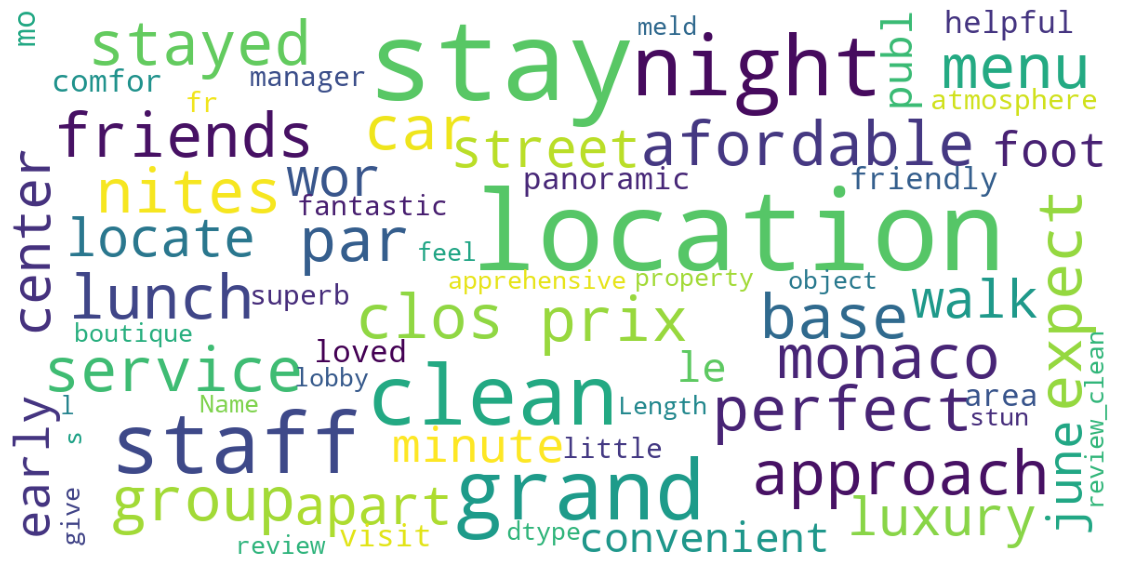

In [67]:
show_wordcloud(data_positive["review_clean"])

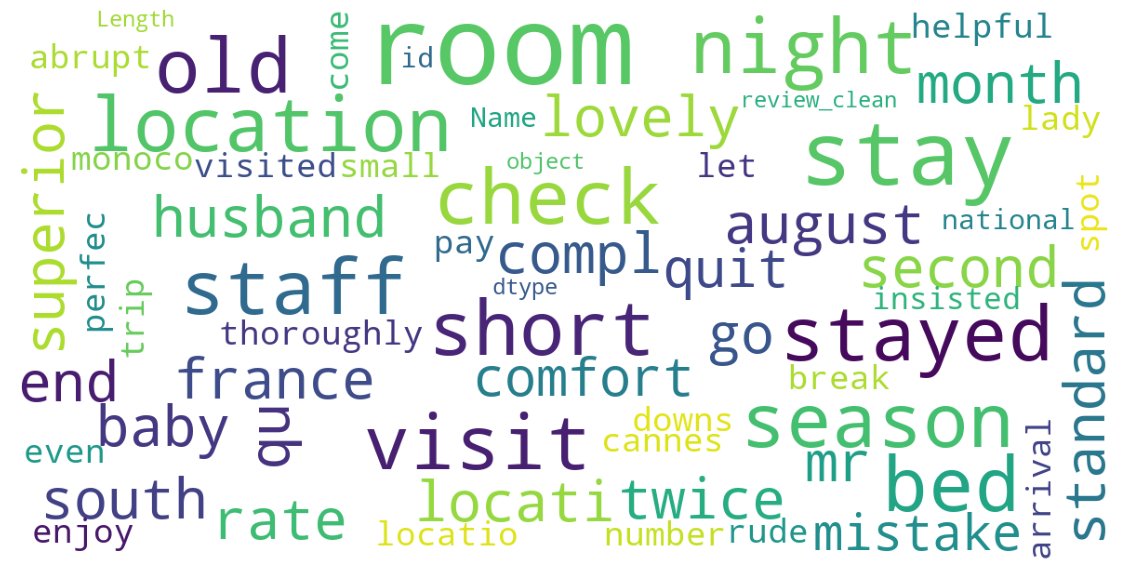

In [68]:
show_wordcloud(data_negative["review_clean"])

In [69]:
# highest positive sentiment reviews (with more than 5 words)
reviews_sen_df1[reviews_sen_df1["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
367,"Clean, new bathrooms, friendly staff, and best...",0.670
282,"Wonderful cost/benefit! Well localized, close ...",0.584
260,Good location. Warm welcome. Clean rooms. Eleg...,0.576
283,"Nice hotel with friendly, caring staff. Alway...",0.572
183,"Location is Good, Service is Great, Clean. Sta...",0.570
1,Amazing nice butiful I am going and this is a ...,0.570
432,"Excellent value with clean well equipped room,...",0.570
30,"Excellent location and outstanding staff, very...",0.557
404,It might not be the cleanest but I wouldn't ca...,0.551
13,"5 stars, I would highly recommend this place -...",0.549


In [70]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_sen_df1[reviews_sen_df1["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)


,review,neg
63,"Very unprofessional, rude, unhelpful, unfriend...",0.369
133,very bad first approach ! a rude receptionist ...,0.333
26,"WLAN was not working. On the wall, TV mount in...",0.317
83,"It was so disgusting to wake up, and firstly t...",0.303
328,One of the worst hotels you can ever stay in- ...,0.299
22,I was looking forward to staying at this hotel...,0.290
99,"Modern decor in room, but overall not very wel...",0.282
60,The location of the hotel was not good. It was...,0.276
238,"Sad, very sad :( The full hotel is not oriente...",0.273
242,Big disappointment. First of all: the entrance...,0.271


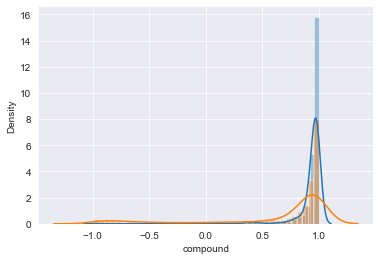

In [71]:
# plot sentiment distribution for positive and negative reviews
# The compound score is the sum of positive, negative & neutral scores
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
import seaborn as sns

for x in [0, 1]:
    subset = reviews_sen_df1[reviews_sen_df1['is_bad_review'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = True, label = label)